In [ ]:
import numpy as np
import pandas as pd
import os
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_df=pd.read_csv('sign_mnist_train1.csv')
test_df=pd.read_csv('sign_mnist_test1.csv')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Columns: 785 entries, label to pixel784
dtypes: float64(16), int64(769)
memory usage: 35.2 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5525 entries, 0 to 5524
Columns: 785 entries, label to pixel784
dtypes: float64(782), int64(3)
memory usage: 33.1 MB


In [ ]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,...,5871.000000,5871.000000,5871.000000,5871.000000,5871.000000,5871.000000,5871.000000,5871.000000,5871.000000,5871.000000
mean,12.196185,146.195163,149.327827,151.992337,154.192609,156.820163,159.064373,161.108481,162.977861,164.624659,...,142.461932,148.663090,154.410833,160.065066,163.172032,164.006813,164.172543,163.119400,162.125021,161.012093
std,7.304180,42.025563,40.480667,39.722849,39.273654,37.777626,36.597182,35.479627,34.205171,32.999313,...,63.742737,64.996532,63.545647,63.012242,62.991831,62.781018,62.746933,62.406325,62.679336,63.288784
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,122.000000,126.000000,130.000000,134.000000,137.000000,140.000000,142.000000,145.000000,147.000000,...,93.000000,97.000000,104.000000,114.000000,124.000000,129.000000,131.000000,132.000000,131.000000,129.000000
50%,13.000000,151.000000,154.000000,157.000000,159.000000,161.000000,163.000000,164.000000,166.000000,167.000000,...,146.000000,164.000000,173.000000,181.000000,183.000000,184.000000,185.000000,183.000000,182.000000,182.000000
75%,18.000000,175.000000,177.000000,179.000000,180.000000,182.000000,183.000000,184.000000,185.000000,186.000000,...,198.000000,203.000000,205.000000,207.000000,208.000000,208.000000,207.000000,206.000000,205.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
train_label=train_df['label']
train_label.head()
trainset=train_df.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207.0,207.0,207.0,207.0,206.0,206.0,206.0,204.0,203.0,202.0
1,155,157,156,156,156,157,156,158,158,157,...,69.0,149.0,128.0,87.0,94.0,163.0,175.0,103.0,135.0,149.0
2,187,188,188,187,187,186,187,188,187,186,...,202.0,201.0,200.0,199.0,198.0,199.0,198.0,195.0,194.0,195.0
3,211,211,212,212,211,210,211,210,210,211,...,235.0,234.0,233.0,231.0,230.0,226.0,225.0,222.0,229.0,163.0
4,164,167,170,172,176,179,180,184,185,186,...,92.0,105.0,105.0,108.0,133.0,163.0,157.0,163.0,164.0,179.0


In [ ]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(5872, 28, 28, 1)


In [ ]:
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(5525, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150.0,150.0,150.0,151.0,151.0,150.0,151.0,152.0,...,138.0,148.0,127.0,89.0,82.0,96.0,106.0,112.0,120.0,107.0
1,126,128,131.0,132.0,133.0,134.0,135.0,135.0,136.0,138.0,...,47.0,104.0,194.0,183.0,186.0,184.0,184.0,184.0,182.0,180.0
2,85,88,92.0,96.0,105.0,123.0,135.0,143.0,147.0,152.0,...,68.0,166.0,242.0,227.0,230.0,227.0,226.0,225.0,224.0,222.0
3,203,205,207.0,206.0,207.0,209.0,210.0,209.0,210.0,209.0,...,154.0,248.0,247.0,248.0,253.0,236.0,230.0,240.0,253.0,255.0
4,188,191,193.0,195.0,199.0,201.0,202.0,203.0,203.0,203.0,...,26.0,40.0,64.0,48.0,29.0,46.0,49.0,46.0,46.0,53.0


In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

In [ ]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
X_test=X_test.values.reshape(-1,28,28,1)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(5872, 28, 28, 1) (5872, 24) (5525, 28, 28, 1) (5525, 24)


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

X_test=X_test/255

Text(0.5, 1.0, 'label: 13  letter: M')

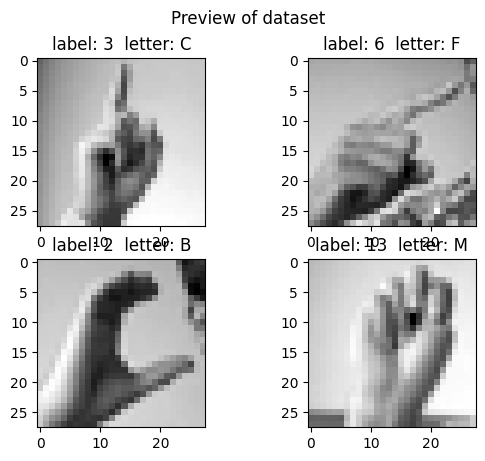

In [ ]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C') i
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(X_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

BUILDING CNN MODEL

In [ ]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))

model.add(Flatten())

In [ ]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 32)          0

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kfold.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Create data generators for the fold
    train_datagen_fold = train_datagen.flow(X_train_fold, y_train_fold, batch_size=200)

    # Train the model on the fold
    model.fit(
        train_datagen_fold,
        epochs=35,
        validation_data=(X_test_fold, y_test_fold),
        shuffle=False  # Shuffle within the fold, but not across folds
    )



Epoch 1/35
24/24 [==============================] - 9s 124ms/step - loss: 3.1782 - accuracy: 0.0394 - val_loss: 23.4138 - val_accuracy: 0.0434
Epoch 2/35
24/24 [==============================] - 2s 82ms/step - loss: 3.1717 - accuracy: 0.0466 - val_loss: 28.5247 - val_accuracy: 0.0732
Epoch 3/35
24/24 [==============================] - 2s 81ms/step - loss: nan - accuracy: 0.0517 - val_loss: nan - val_accuracy: 0.0451
Epoch 4/35
24/24 [==============================] - 2s 82ms/step - loss: nan - accuracy: 0.0432 - val_loss: nan - val_accuracy: 0.0451
Epoch 5/35
24/24 [==============================] - 2s 90ms/step - loss: nan - accuracy: 0.0432 - val_loss: nan - val_accuracy: 0.0451
Epoch 6/35
24/24 [==============================] - 3s 113ms/step - loss: nan - accuracy: 0.0432 - val_loss: nan - val_accuracy: 0.0451
Epoch 7/35
24/24 [==============================] - 2s 83ms/step - loss: nan - accuracy: 0.0432 - val_loss: nan - val_accuracy: 0.0451
Epoch 8/35
24/24 [=====================

In [ ]:
(ls,acc)=model.evaluate(x=X_test,y=y_test)

173/173 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0425


In [ ]:
print('MODEL ACCURACY = {}%'.format(acc*100))

MODEL ACCURACY = 4.253393784165382%
